In [0]:
import time

import pandas as pd
import numpy as np
from pyspark.sql.functions import count,isnan, when, avg, col, from_unixtime, lit, months_between,floor, unix_timestamp,countDistinct, expr, datediff, lag, desc
from pyspark.sql.types import IntegerType
from pyspark.sql.window import Window
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.classification import LogisticRegression, GBTClassifier, LinearSVC, RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

In [0]:
file_location = "/FileStore/tables/mini_sparkify_event_data.json"
file_type = "json"

df = spark.read.format(file_type)\
     .option("inferSchema", "false")\
     .option("header", "false")\
     .option("sep", ",")\
     .load(file_location)

display(df)

artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30
Five Iron Frenzy,Logged In,Micah,M,79,Long,236.09424,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Canada,200,1538352180000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36""",9
Adam Lambert,Logged In,Colin,M,51,Freeman,282.8273,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30
Enigma,Logged In,Micah,M,80,Long,262.71302,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Knocking On Forbidden Doors,200,1538352416000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36""",9
Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30
The All-American Rejects,Logged In,Micah,M,81,Long,208.29995,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Don't Leave Me,200,1538352678000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36""",9
The Velvet Underground / Nico,Logged In,Micah,M,82,Long,260.46649,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1538331630000,8,Run Run Run,200,1538352886000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36""",9
Starflyer 59,Logged In,Colin,M,53,Freeman,185.44281,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Passengers (Old Album Version),200,1538352899000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30
null,Logged In,Colin,M,54,Freeman,null,paid,"Bakersfield, CA",PUT,Add to Playlist,1538173362000,29,null,200,1538352905000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30
Frumpies,Logged In,Colin,M,55,Freeman,134.47791,paid,"Bakersfield, CA",PUT,NextSong,1538173362000,29,Fuck Kitty,200,1538353084000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30


In [0]:
df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [0]:
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+
|artist|auth|firstName|gender|itemInSession|lastName|length|level|location|method|page|registration|sessionId|song|status| ts|userAgent|userId|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+
|     0|   0|        0|     0|            0|       0|     0|    0|       0|     0|   0|           0|        0|   0|     0|  0|        0|     0|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+



In [0]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+
|artist|auth|firstName|gender|itemInSession|lastName|length|level|location|method|page|registration|sessionId| song|status| ts|userAgent|userId|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+
| 58392|   0|     8346|  8346|            0|    8346| 58392|    0|    8346|     0|   0|        8346|        0|58392|     0|  0|     8346|     0|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+-----+------+---+---------+------+



In [0]:
#lets filter out the entries with missing names
df = df.filter(df.firstName.isNotNull())

In [0]:
df.describe("ts").show(truncate = False)

+-------+---------------------+
|summary|ts                   |
+-------+---------------------+
|count  |278154               |
|mean   |1.5409589154318582E12|
|stddev |1.506828712336339E9  |
|min    |1538352117000        |
|max    |1543799476000        |
+-------+---------------------+



In [0]:
ts = int(1538352011000)
ts /= 1000
print("Start Time: {}".format(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')))

ts = int(1543622466000)
ts /= 1000
print("End Time: {}".format(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')))

Start Time: 2018-10-01 00:00:11
End Time: 2018-12-01 00:01:06


In [0]:
# add a constant column for start date
df = df.withColumn('start_date', lit('2018-10-01 00:00:00'))

In [0]:
# time in seconds
convert_to_seconds = udf(lambda x : x//1000, IntegerType())
df = df.withColumn("adj_ts", convert_to_seconds('ts'))
df = df.withColumn("adj_reg", convert_to_seconds('registration'))

# drop all the timestamp columns. Will not need them
columns_to_drop = ['registration', 'ts']
df = df.drop(*columns_to_drop)

# converting to utc format
df = df.withColumn("ts", from_unixtime(col("adj_ts")))
df = df.withColumn("registration", from_unixtime(col("adj_reg")))

columns_to_drop = ['adj_ts', 'adj_reg']
df = df.drop(*columns_to_drop)


In [0]:
# number the months starting from the very first month of the analysis
df = df.withColumn("months_btw", floor(months_between(df.ts, df.start_date)))

In [0]:
def define_churn(x):
    """
    Defining churn as cancellation of service or downgrading from premium to free tier.
    """
    if x == "Cancellation Confirmation":
        return 1
    elif x == "Submit Downgrade":
        return 1
    else:
        return 0
    
churn_event = udf(lambda x : define_churn(x), IntegerType())
df = df.withColumn("churn", churn_event("page"))

In [0]:
# encoding free and paid as 0 and 1 
df = df.replace(["free", "paid"], ["0", "1"], "level")

# encoding male and female as 0 and 1
df = df.replace(["M", "F"], ["0", "1"], "gender")

In [0]:
display(df)

artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,sessionId,song,status,userAgent,userId,start_date,ts,registration,months_btw,churn
Martha Tilston,Logged In,Colin,0,50,Freeman,277.89016,1,"Bakersfield, CA",PUT,NextSong,29,Rockpools,200,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30,2018-10-01 00:00:00,2018-10-01 00:01:57,2018-09-28 22:22:42,0,0
Five Iron Frenzy,Logged In,Micah,0,79,Long,236.09424,0,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,8,Canada,200,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36""",9,2018-10-01 00:00:00,2018-10-01 00:03:00,2018-09-30 18:20:30,0,0
Adam Lambert,Logged In,Colin,0,51,Freeman,282.8273,1,"Bakersfield, CA",PUT,NextSong,29,Time For Miracles,200,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30,2018-10-01 00:00:00,2018-10-01 00:06:34,2018-09-28 22:22:42,0,0
Enigma,Logged In,Micah,0,80,Long,262.71302,0,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,8,Knocking On Forbidden Doors,200,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36""",9,2018-10-01 00:00:00,2018-10-01 00:06:56,2018-09-30 18:20:30,0,0
Daft Punk,Logged In,Colin,0,52,Freeman,223.60771,1,"Bakersfield, CA",PUT,NextSong,29,Harder Better Faster Stronger,200,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30,2018-10-01 00:00:00,2018-10-01 00:11:16,2018-09-28 22:22:42,0,0
The All-American Rejects,Logged In,Micah,0,81,Long,208.29995,0,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,8,Don't Leave Me,200,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36""",9,2018-10-01 00:00:00,2018-10-01 00:11:18,2018-09-30 18:20:30,0,0
The Velvet Underground / Nico,Logged In,Micah,0,82,Long,260.46649,0,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,8,Run Run Run,200,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36""",9,2018-10-01 00:00:00,2018-10-01 00:14:46,2018-09-30 18:20:30,0,0
Starflyer 59,Logged In,Colin,0,53,Freeman,185.44281,1,"Bakersfield, CA",PUT,NextSong,29,Passengers (Old Album Version),200,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30,2018-10-01 00:00:00,2018-10-01 00:14:59,2018-09-28 22:22:42,0,0
null,Logged In,Colin,0,54,Freeman,null,1,"Bakersfield, CA",PUT,Add to Playlist,29,null,200,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30,2018-10-01 00:00:00,2018-10-01 00:15:05,2018-09-28 22:22:42,0,0
Frumpies,Logged In,Colin,0,55,Freeman,134.47791,1,"Bakersfield, CA",PUT,NextSong,29,Fuck Kitty,200,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,30,2018-10-01 00:00:00,2018-10-01 00:18:04,2018-09-28 22:22:42,0,0


In [0]:
df.select("page").dropDuplicates().show(truncate = False)

+-------------------------+
|page                     |
+-------------------------+
|Submit Downgrade         |
|Thumbs Down              |
|Home                     |
|Downgrade                |
|Roll Advert              |
|Logout                   |
|Save Settings            |
|About                    |
|Settings                 |
|Add to Playlist          |
|Add Friend               |
|NextSong                 |
|Thumbs Up                |
|Help                     |
|Upgrade                  |
|Error                    |
|Submit Upgrade           |
|Cancel                   |
|Cancellation Confirmation|
+-------------------------+



In [0]:
df_cancel = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Cancel") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numCancelVisits')

In [0]:
display(df_cancel)

userId,months_btw,numCancelVisits
122,0,1
12,0,1
87,0,1
18,0,1
32,0,1
3,0,1
53,1,1
300007,0,1
200016,1,1
200018,1,1


In [0]:
df_upgrade = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Upgrade") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numUpgradeVisits')

In [0]:
display(df_upgrade)

userId,months_btw,numUpgradeVisits
126,0,3
67,0,2
66,0,3
4,0,4
20,0,2
71,0,3
138,0,1
150,0,2
74,0,2
103,0,4


Output can only be rendered in Databricks

In [0]:
df_downgrade = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Downgrade") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numDowngradeVisits')

In [0]:
display(df_downgrade)

userId,months_btw,numDowngradeVisits
120,0,17
101,0,22
9,0,10
69,0,4
54,0,22
33,0,5
95,0,15
6,0,18
96,0,4
35,0,4


Output can only be rendered in Databricks

In [0]:
df_home = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Home") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numHomeVisits')

In [0]:
display(df_home)

userId,months_btw,numHomeVisits
55,0,5
120,0,41
126,0,72
146,0,14
38,0,20
118,0,46
9,0,49
67,0,35
66,0,28
69,0,31


Output can only be rendered in Databricks

In [0]:
df_about = df.select('userId', 'months_btw', 'page') \
.where(df.page=="About") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAboutVisits')

In [0]:
display(df_about)

userId,months_btw,numAboutVisits
67,0,3
41,0,2
20,0,1
52,0,1
138,0,6
73,0,1
16,0,1
74,0,3
37,0,3
10,0,2


Output can only be rendered in Databricks

In [0]:
df_settings = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Settings") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSettingsVisits')

In [0]:
display(df_settings)

userId,months_btw,numSettingsVisits
149,0,3
120,0,8
9,0,4
136,0,6
52,0,4
89,0,6
58,0,11
95,0,10
138,0,9
6,0,8


Output can only be rendered in Databricks

In [0]:
df_saveSettings = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Save Settings") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSaveSettings')

In [0]:
display(df_saveSettings)

userId,months_btw,numSaveSettings
120,0,1
118,0,3
101,0,2
115,0,4
107,0,1
18,0,1
54,0,2
58,0,2
6,0,1
129,0,1


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
df_addPlaylist = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Add to Playlist") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAddPlaylists')

In [0]:
display(df_addPlaylist)

userId,months_btw,numAddPlaylists
55,0,4
126,0,46
127,0,12
146,0,7
78,0,5
118,0,40
101,0,61
88,0,14
9,0,27
67,0,32


Output can only be rendered in Databricks

In [0]:
df_thumbsUp = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Thumbs Up") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numThumbsUp')

In [0]:
display(df_thumbsUp)

userId,months_btw,numThumbsUp
55,0,4
149,0,11
120,0,73
126,0,75
38,0,17
7,0,4
118,0,63
101,0,86
9,0,57
66,0,29


Output can only be rendered in Databricks

In [0]:
df_thumbsDown = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Thumbs Down") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numThumbsDown')

In [0]:
display(df_thumbsDown)

userId,months_btw,numThumbsDown
120,0,9
127,0,5
126,0,10
146,0,4
118,0,11
101,0,16
9,0,17
107,0,2
69,0,7
54,0,18


Output can only be rendered in Databricks

In [0]:
df_songsPlayed = df.select('userId', 'months_btw', 'page') \
.where(df.page=="NextSong") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSongsPlayed')

In [0]:
display(df_songsPlayed)

userId,months_btw,numSongsPlayed
55,0,106
120,0,1301
126,0,1414
127,0,378
146,0,306
38,0,336
7,0,109
78,0,168
118,0,1186
101,0,1797


Output can only be rendered in Databricks

In [0]:
df_totalListen = df.select('userId', 'months_btw', 'length') \
.groupBy('userId', 'months_btw') \
.agg({'length':'sum'}) \
.withColumnRenamed('sum(length)', 'totalListenTime')

In [0]:
display(df_totalListen)

userId,months_btw,totalListenTime
55,0,28080.87936
120,0,325147.59616999986
126,0,355429.15804999985
146,0,77374.11103
38,0,80365.06549000002
118,0,294361.40183000005
88,0,164906.95628000004
9,0,267122.50729999994
67,0,228937.08696000002
66,0,163360.69563999996


Output can only be rendered in Databricks

In [0]:
df_songsPerSession = df.select('userId', 'months_btw', 'page', 'sessionId') \
.where(df.page=="NextSong") \
.groupBy('userId', 'months_btw', 'sessionId') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'SongsPerSession')
# avg number of songs per session
df_avgSongsPerSession = df_songsPerSession.groupBy('userId', 'months_btw') \
.agg(avg(df_songsPerSession.SongsPerSession).alias('avgSongsPerSession'))

In [0]:
display(df_avgSongsPerSession)

userId,months_btw,avgSongsPerSession
55,0,17.666666666666668
149,0,62.0
120,0,144.55555555555554
200001,0,28.75
126,0,83.17647058823529
155,1,136.66666666666666
100022,0,39.4
127,0,54.0
2,1,82.25
5,1,54.0


Output can only be rendered in Databricks

In [0]:
# number of sessions
df_numSession = df.select('userId', 'months_btw', 'sessionId').dropDuplicates() \
.groupby('userId', 'months_btw').agg({'sessionId':'count'}) \
.withColumnRenamed('count(sessionId)', 'numSessions')

In [0]:
display(df_numSession)

userId,months_btw,numSessions
149,0,3
55,0,6
120,0,9
200001,0,6
126,0,18
127,0,7
155,1,6
2,1,4
100022,0,10
5,1,1


Output can only be rendered in Databricks

In [0]:
# number of singers
df_singersPlayed = df.select('userId', 'months_btw', 'page', 'artist') \
.where(df.page=="NextSong") \
.groupBy('userId', 'months_btw') \
.agg(countDistinct(df.artist).alias('numSingersPlayed'))

In [0]:
display(df_singersPlayed)

userId,months_btw,numSingersPlayed
55,0,104
149,0,173
120,0,956
200001,0,110
126,0,1009
127,0,339
155,1,643
2,1,290
100022,0,348
5,1,54


Output can only be rendered in Databricks

In [0]:
df_advert = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Roll Advert") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAdverts')

In [0]:
display(df_advert)

userId,months_btw,numAdverts
55,0,12
126,0,31
127,0,1
146,0,28
7,0,13
78,0,8
118,0,25
101,0,8
88,0,22
9,0,16


Output can only be rendered in Databricks

In [0]:
df_level = df.select('userId', 'months_btw', 'level') \
.groupBy('userId', 'months_btw') \
.agg({'level':'max'}) \
.withColumnRenamed('max(level)', 'level')

In [0]:
display(df_level)

userId,months_btw,level
10,0,1
10,1,1
100,0,1
100,1,1
100001,0,0
100002,0,1
100002,1,1
100002,2,1
100003,0,0
100004,0,1


Output can only be rendered in Databricks

In [0]:
df = df.withColumn("start_of_month", expr("add_months(start_date, months_btw)"))
# days since registration from start of each month
# from https://stackoverflow.com/questions/44020818/how-to-calculate-date-difference-in-pyspark
df = df.withColumn("daysSinceReg", datediff(df.start_of_month, df.registration))
#
df_daysReg = df.select('userId', 'months_btw', 'daysSinceReg') \
.groupBy('userId', 'months_btw','daysSinceReg') \
.agg(df.daysSinceReg.alias('daysSinceReg'))

In [0]:
df_cols = df_daysReg.columns
# get index of the duplicate columns
duplicate_col_index = list(set([df_cols.index(c) for c in df_cols if df_cols.count(c) == 2]))

# rename by adding suffix '_duplicated'
for i in duplicate_col_index:
    df_cols[i] = df_cols[i] + '_duplicated'

# rename the column in DF
df_daysReg = df_daysReg.toDF(*df_cols)

# remove flagged columns
cols_to_remove = [c for c in df_cols if '_duplicated' in c]
df_daysReg.drop(*cols_to_remove).show()


+------+----------+------------+
|userId|months_btw|daysSinceReg|
+------+----------+------------+
|   147|         0|          10|
|   120|         0|          69|
|    95|         0|           2|
|    91|         0|          58|
|   131|         0|          61|
|   140|         0|          20|
|    40|         0|          33|
|   101|         0|          39|
|    77|         0|           7|
|   107|         0|          24|
|    85|         0|          49|
|    97|         0|          27|
|    17|         0|           1|
|     6|         0|         197|
|    29|         0|          16|
|    82|         0|          17|
|    65|         0|          12|
|    33|         0|         106|
|   122|         0|          34|
|   142|         0|           3|
+------+----------+------------+
only showing top 20 rows



In [0]:
display(df_daysReg)

userId,months_btw,daysSinceReg_duplicated,daysSinceReg
45,0,23,23
38,0,15,15
88,0,20,20
42,0,7,7
120,0,69,69
95,0,2,2
66,0,67,67
148,0,10,10
52,0,44,44
87,0,40,40


Output can only be rendered in Databricks

In [0]:
df_gender = df.select('userId', 'months_btw', 'gender') \
.groupBy('userId', 'months_btw') \
.agg({'gender':'max'}) \
.withColumnRenamed('max(gender)', 'gender')

In [0]:
display(df_gender)

userId,months_btw,gender
10,0,0
10,1,0
100,0,0
100,1,0
100001,0,1
100002,0,1
100002,1,1
100002,2,1
100003,0,1
100004,0,1


Output can only be rendered in Databricks

In [0]:
df_addFriend = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Add Friend") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numFriends')

In [0]:
display(df_addFriend)

userId,months_btw,numFriends
120,0,18
118,0,23
101,0,29
9,0,10
115,0,16
107,0,2
69,0,11
20,0,15
18,0,10
54,0,26


Output can only be rendered in Databricks

In [0]:
df_logout = df.select('userId', 'months_btw', 'page') \
.where(df.page=="Logout") \
.groupBy('userId', 'months_btw') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numLogouts')

In [0]:
display(df_logout)

userId,months_btw,numLogouts
55,0,3
126,0,29
146,0,2
118,0,13
67,0,14
66,0,12
69,0,6
41,0,10
4,0,9
20,0,14


Output can only be rendered in Databricks

In [0]:
df_churn = df.select('userId', 'months_btw', 'churn') \
.groupBy('userId', 'months_btw') \
.agg({'churn':'max'}) \
.withColumnRenamed('max(churn)', 'churn')

In [0]:
display(df_churn)

userId,months_btw,churn
120,0,0
126,0,0
127,0,0
78,0,0
118,0,0
101,0,1
88,0,0
9,0,1
115,0,0
67,0,0


Output can only be rendered in Databricks

In [0]:
all_data = df_cancel.join(df_upgrade, ['userId', 'months_btw'], 'outer') \
.join(df_downgrade, ['userId', 'months_btw'], 'outer') \
.join(df_home, ['userId', 'months_btw'], 'outer') \
.join(df_about, ['userId', 'months_btw'], 'outer') \
.join(df_settings, ['userId', 'months_btw'], 'outer') \
.join(df_saveSettings, ['userId', 'months_btw'], 'outer') \
.join(df_logout, ['userId', 'months_btw'], 'outer') \
.join(df_addPlaylist, ['userId', 'months_btw'], 'outer') \
.join(df_addFriend, ['userId', 'months_btw'], 'outer') \
.join(df_thumbsUp, ['userId', 'months_btw'], 'outer') \
.join(df_thumbsDown, ['userId', 'months_btw'], 'outer') \
.join(df_advert, ['userId', 'months_btw'], 'outer') \
.join(df_songsPlayed, ['userId', 'months_btw'], 'outer') \
.join(df_totalListen, ['userId', 'months_btw'], 'outer') \
.join(df_avgSongsPerSession, ['userId', 'months_btw'], 'outer') \
.join(df_singersPlayed, ['userId', 'months_btw']) \
.join(df_numSession, ['userId', 'months_btw'], 'outer') \
.join(df_level, ['userId', 'months_btw'], 'outer') \
.join(df_gender, ['userId', 'months_btw'], 'outer') \
.join(df_daysReg, ['userId', 'months_btw'], 'outer') \
.join(df_churn, ['userId', 'months_btw'], 'outer')

In [0]:
all_data.printSchema()

root
 |-- userId: string (nullable = true)
 |-- months_btw: long (nullable = true)
 |-- numCancelVisits: long (nullable = true)
 |-- numUpgradeVisits: long (nullable = true)
 |-- numDowngradeVisits: long (nullable = true)
 |-- numHomeVisits: long (nullable = true)
 |-- numAboutVisits: long (nullable = true)
 |-- numSettingsVisits: long (nullable = true)
 |-- numSaveSettings: long (nullable = true)
 |-- numLogouts: long (nullable = true)
 |-- numAddPlaylists: long (nullable = true)
 |-- numFriends: long (nullable = true)
 |-- numThumbsUp: long (nullable = true)
 |-- numThumbsDown: long (nullable = true)
 |-- numAdverts: long (nullable = true)
 |-- numSongsPlayed: long (nullable = true)
 |-- totalListenTime: double (nullable = true)
 |-- avgSongsPerSession: double (nullable = true)
 |-- numSingersPlayed: long (nullable = true)
 |-- numSessions: long (nullable = true)
 |-- level: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- daysSinceReg_duplicated: integer (nullable

In [0]:
windowlag = (Window.partitionBy('userId').orderBy('months_btw'))

# generate 1 month lag features
all_data = all_data.withColumn('numCancelVisits_lastMonth', lag(all_data['numCancelVisits']).over(windowlag))
all_data = all_data.withColumn('numUpgradeVisits_lastMonth', lag(all_data['numUpgradeVisits']).over(windowlag))
all_data = all_data.withColumn('numDowngradeVisits_lastMonth', lag(all_data['numDowngradeVisits']).over(windowlag))
all_data = all_data.withColumn('numHomeVisits_lastMonth', lag(all_data['numHomeVisits']).over(windowlag))
all_data = all_data.withColumn('numAboutVisits_lastMonth', lag(all_data['numAboutVisits']).over(windowlag))
all_data = all_data.withColumn('numSettingsVisits_lastMonth', lag(all_data['numSettingsVisits']).over(windowlag))
all_data = all_data.withColumn('numSaveSettings_lastMonth', lag(all_data['numSaveSettings']).over(windowlag))
all_data = all_data.withColumn('numLogouts_lastMonth', lag(all_data['numLogouts']).over(windowlag))
all_data = all_data.withColumn('numAddPlaylists_lastMonth', lag(all_data['numAddPlaylists']).over(windowlag))
all_data = all_data.withColumn('numFriends_lastMonth', lag(all_data['numFriends']).over(windowlag))
all_data = all_data.withColumn('numThumbsUp_lastMonth', lag(all_data['numThumbsUp']).over(windowlag))
all_data = all_data.withColumn('numThumbsDown_lastMonth', lag(all_data['numThumbsDown']).over(windowlag))
all_data = all_data.withColumn('numAdverts_lastMonth', lag(all_data['numAdverts']).over(windowlag))
all_data = all_data.withColumn('numSongsPlayed_lastMonth', lag(all_data['numSongsPlayed']).over(windowlag))
all_data = all_data.withColumn('totalListenTime_lastMonth', lag(all_data['totalListenTime']).over(windowlag))
all_data = all_data.withColumn('avgSongsPerSession_lastMonth', lag(all_data['avgSongsPerSession']).over(windowlag))
all_data = all_data.withColumn('numSingersPlayed_lastMonth', lag(all_data['numSingersPlayed']).over(windowlag))
all_data = all_data.withColumn('numSessions_lastMonth', lag(all_data['numSessions']).over(windowlag))
all_data = all_data.withColumn('level_lastMonth', lag(all_data['level']).over(windowlag))

In [0]:
display(all_data)

userId,months_btw,numCancelVisits,numUpgradeVisits,numDowngradeVisits,numHomeVisits,numAboutVisits,numSettingsVisits,numSaveSettings,numLogouts,numAddPlaylists,numFriends,numThumbsUp,numThumbsDown,numAdverts,numSongsPlayed,totalListenTime,avgSongsPerSession,numSingersPlayed,numSessions,level,gender,daysSinceReg_duplicated,daysSinceReg,churn,numCancelVisits_lastMonth,numUpgradeVisits_lastMonth,numDowngradeVisits_lastMonth,numHomeVisits_lastMonth,numAboutVisits_lastMonth,numSettingsVisits_lastMonth,numSaveSettings_lastMonth,numLogouts_lastMonth,numAddPlaylists_lastMonth,numFriends_lastMonth,numThumbsUp_lastMonth,numThumbsDown_lastMonth,numAdverts_lastMonth,numSongsPlayed_lastMonth,totalListenTime_lastMonth,avgSongsPerSession_lastMonth,numSingersPlayed_lastMonth,numSessions_lastMonth,level_lastMonth
10,0,null,null,3,21,2,5,null,5,8,9,28,4,null,459,113208.89566,153.0,406,3,1,0,3,3,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
10,1,null,null,4,9,null,2,1,6,1,3,9,null,1,214,53657.47684999999,71.33333333333333,196,3,1,0,34,34,0,null,null,3,21,2,5,null,5,8,9,28,4,null,459,113208.89566,153.0,406,3,1
100,0,null,null,14,52,9,7,3,17,34,27,67,11,1,1216,301696.0494499999,67.55555555555556,904,18,1,0,5,5,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100,1,null,1,16,53,3,4,2,18,27,22,81,16,24,1466,371181.80714,86.23529411764706,1087,18,1,0,36,36,1,null,null,14,52,9,7,3,17,34,27,67,11,1,1216,301696.0494499999,67.55555555555556,904,18,1
100001,0,1,2,null,11,null,1,null,7,3,2,8,2,14,133,35073.742150000005,33.25,125,4,0,1,44,44,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100002,0,null,null,null,1,null,null,null,null,1,null,null,null,null,3,695.82231,3.0,3,1,1,1,98,98,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100002,1,null,null,2,5,null,null,null,1,4,1,5,null,3,191,48398.48971,95.5,180,2,1,1,129,129,0,null,null,null,1,null,null,null,null,1,null,null,null,null,3,695.82231,3.0,3,1,1
100002,2,null,null,null,null,null,null,null,null,null,null,null,null,null,1,465.60608,1.0,1,1,1,1,159,159,0,null,null,2,5,null,null,null,1,4,1,5,null,3,191,48398.48971,95.5,180,2,1
100003,0,1,null,null,7,null,null,null,3,2,null,3,null,9,51,12306.419320000003,25.5,50,2,0,1,13,13,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
100004,0,null,3,8,29,null,5,1,9,11,10,14,3,42,413,100942.41519999999,34.416666666666664,369,12,1,1,114,114,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [0]:
# visualize 1 month lag values
all_data_pd = all_data \
.filter(all_data.months_btw>=1) \
.select('userId','numCancelVisits_lastMonth','numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
        'numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth', 'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
        'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', 'numSessions_lastMonth', 'level_lastMonth', 'gender', 'daysSinceReg', 'churn'
        ).toPandas()


In [0]:
pd.set_option('max_columns', None)
all_data_pd.head()

,userId,numCancelVisits_lastMonth,numUpgradeVisits_lastMonth,numDowngradeVisits_lastMonth,numHomeVisits_lastMonth,numAboutVisits_lastMonth,numSettingsVisits_lastMonth,numSaveSettings_lastMonth,numLogouts_lastMonth,numAddPlaylists_lastMonth,numFriends_lastMonth,numThumbsUp_lastMonth,numThumbsDown_lastMonth,numAdverts_lastMonth,numSongsPlayed_lastMonth,totalListenTime_lastMonth,avgSongsPerSession_lastMonth,numSingersPlayed_lastMonth,numSessions_lastMonth,level_lastMonth,gender,daysSinceReg,churn
0,10,NaN,NaN,3.0,21.0,2.0,5.0,NaN,5.0,8.0,9.0,28.0,4.0,NaN,459.0,113208.89566,153.000000,406.0,3.0,1,0,34,0
1,100,NaN,NaN,14.0,52.0,9.0,7.0,3.0,17.0,34.0,27.0,67.0,11.0,1.0,1216.0,301696.04945,67.555556,904.0,18.0,1,0,36,1
2,100002,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,695.82231,3.000000,3.0,1.0,1,1,129,0
3,100002,NaN,NaN,2.0,5.0,NaN,NaN,NaN,1.0,4.0,1.0,5.0,NaN,3.0,191.0,48398.48971,95.500000,180.0,2.0,1,1,159,0
4,100004,NaN,3.0,8.0,29.0,NaN,5.0,1.0,9.0,11.0,10.0,14.0,3.0,42.0,413.0,100942.41520,34.416667,369.0,12.0,1,1,145,0


In [0]:
all_data_pd.columns

Out[67]: Index(['userId', 'numCancelVisits_lastMonth', 'numUpgradeVisits_lastMonth',
       'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth',
       'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth',
       'numSaveSettings_lastMonth', 'numLogouts_lastMonth',
       'numAddPlaylists_lastMonth', 'numFriends_lastMonth',
       'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth',
       'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',
       'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth',
       'numSingersPlayed_lastMonth', 'numSessions_lastMonth',
       'level_lastMonth', 'gender', 'daysSinceReg', 'churn'],
      dtype='object')

Out[68]: <AxesSubplot:title={'center':'Customers who recently upgraded churned more'}, xlabel='churn', ylabel='numUpgradeVisits_lastMonth'>

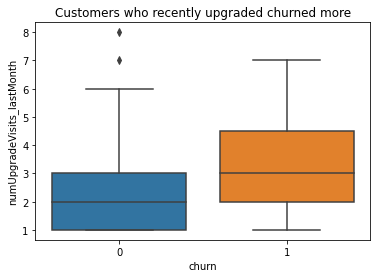

In [0]:
plt.title('Customers who recently upgraded churned more')
sns.boxplot(x="churn", y="numUpgradeVisits_lastMonth", data=all_data_pd)


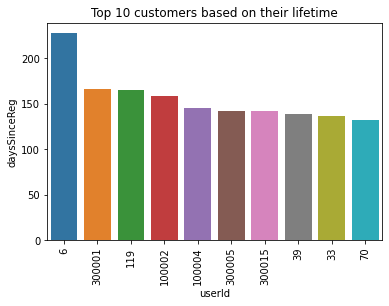

In [0]:
plt.xticks(rotation = 'vertical')
plt.title('Top 10 customers based on their lifetime')

g = sns.barplot(
    x='userId',
    y='daysSinceReg',
    data=all_data_pd.nlargest(10, 'daysSinceReg'),
)

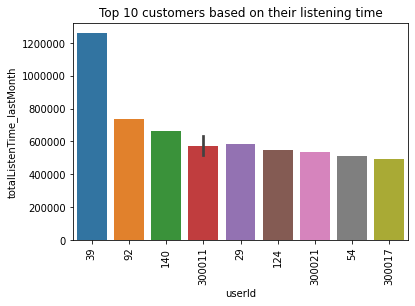

In [0]:
plt.xticks(rotation = 'vertical')
plt.title('Top 10 customers based on their listening time')

g = sns.barplot(
    x='userId',
    y='totalListenTime_lastMonth',
    data=all_data_pd.nlargest(10, 'totalListenTime_lastMonth'),
)

plt.ticklabel_format(style='plain', axis='y')

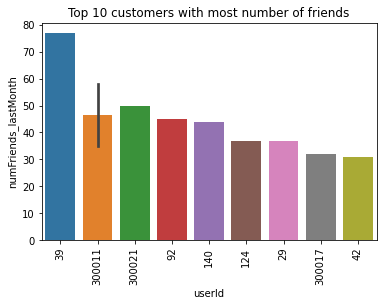

In [0]:
plt.xticks(rotation = 'vertical')
plt.title('Top 10 customers with most number of friends')

g = sns.barplot(
    x='userId',
    y='numFriends_lastMonth',
    data=all_data_pd.nlargest(10, 'numFriends_lastMonth'),
)

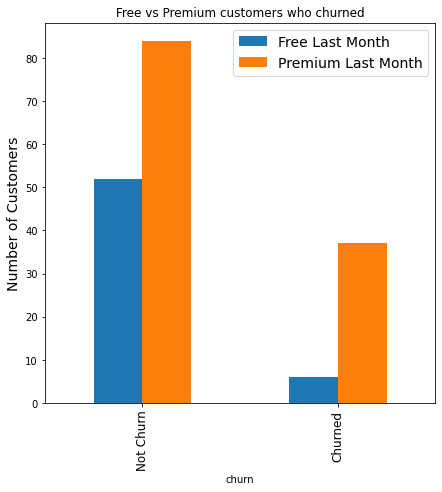

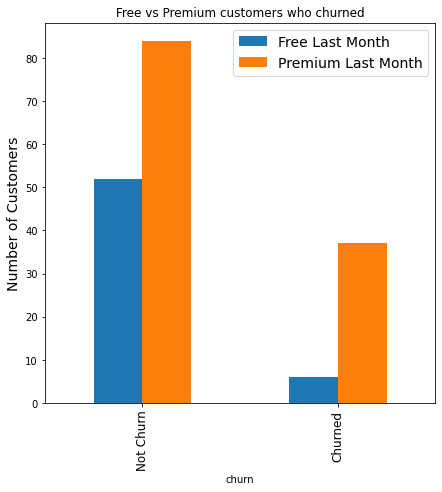

In [0]:
fig, ax = plt.subplots(figsize=(7,7))
all_data_pd.groupby(['churn', 'level_lastMonth']).agg({'level_lastMonth':'count'}).unstack().plot.bar(ax=ax);
ax.legend(["Free Last Month", "Premium Last Month"], fontsize=14);
ax.set_xticklabels(["Not Churn","Churned"], fontsize=12);
ax.set_ylabel("Number of Customers", fontsize=14);
ax.set_title("Free vs Premium customers who churned")
display(fig)

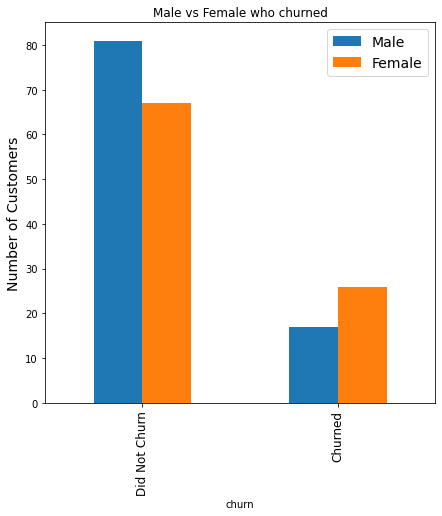

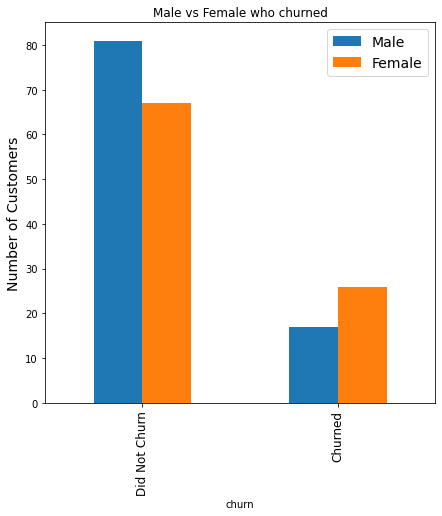

In [0]:
fig, ax = plt.subplots(figsize=(7,7))
all_data_pd.groupby(['churn', 'gender']).agg({'gender':'count'}).unstack().plot.bar(ax=ax);
ax.legend(["Male", "Female"], fontsize=14);
ax.set_xticklabels(["Did Not Churn","Churned"], fontsize=12);
ax.set_ylabel("Number of Customers", fontsize=14);
ax.set_title("Male vs Female who churned")
display(fig)

In [0]:
convert_numeric = ['userId', 'level', 'gender', 'level_lastMonth']
for feat in convert_numeric:
    featName = feat + "_n"
    all_data = all_data.withColumn(featName, all_data[feat].cast("float"))
    all_data = all_data.drop(feat)
    
# fill na/null values with 0
all_data = all_data.na.fill(0.0)

In [0]:
all_data.persist()

Out[75]: DataFrame[months_btw: bigint, numCancelVisits: bigint, numUpgradeVisits: bigint, numDowngradeVisits: bigint, numHomeVisits: bigint, numAboutVisits: bigint, numSettingsVisits: bigint, numSaveSettings: bigint, numLogouts: bigint, numAddPlaylists: bigint, numFriends: bigint, numThumbsUp: bigint, numThumbsDown: bigint, numAdverts: bigint, numSongsPlayed: bigint, totalListenTime: double, avgSongsPerSession: double, numSingersPlayed: bigint, numSessions: bigint, daysSinceReg_duplicated: int, daysSinceReg: int, churn: int, numCancelVisits_lastMonth: bigint, numUpgradeVisits_lastMonth: bigint, numDowngradeVisits_lastMonth: bigint, numHomeVisits_lastMonth: bigint, numAboutVisits_lastMonth: bigint, numSettingsVisits_lastMonth: bigint, numSaveSettings_lastMonth: bigint, numLogouts_lastMonth: bigint, numAddPlaylists_lastMonth: bigint, numFriends_lastMonth: bigint, numThumbsUp_lastMonth: bigint, numThumbsDown_lastMonth: bigint, numAdverts_lastMonth: bigint, numSongsPlayed_lastMonth: bigint

In [0]:
#Only modelling with the last month data
model_data = all_data.filter(all_data.months_btw>0) \
.select('userId_n', 'months_btw', 'numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth','numSettingsVisits_lastMonth',\
        'numSaveSettings_lastMonth','numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth',\
        'numAdverts_lastMonth', 'numSongsPlayed_lastMonth', 'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', \
        'numSessions_lastMonth', 'level_lastMonth_n', 'gender_n', 'daysSinceReg', 'churn'
        ).withColumnRenamed('churn', 'label')

In [0]:
inputColumns = ['numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
                'numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth', 'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
                'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', 'numSessions_lastMonth', 'daysSinceReg']


assembler = VectorAssembler(inputCols=inputColumns, outputCol="FeaturesVec")

scaler = StandardScaler(inputCol="FeaturesVec", outputCol="features", withMean=True, withStd=True)

final_vector = VectorAssembler(inputCols=['level_lastMonth_n', 'gender_n']+['features'], 
                               outputCol='features_vector')

In [0]:
# Transform data
model_data = assembler.transform(model_data)

model_data_feature_standardize = scaler.fit(model_data)
model_data = model_data_feature_standardize.transform(model_data)

model_data = final_vector.transform(model_data)

In [0]:
#final data
model_data = model_data.select(model_data.label, model_data.features_vector)
model_data.show(5)

+-----+--------------------+
|label|     features_vector|
+-----+--------------------+
|    0|[0.0,1.0,-0.30254...|
|    0|[1.0,0.0,0.281148...|
|    0|[1.0,1.0,-0.88623...|
|    0|[0.0,0.0,0.281148...|
|    0|[1.0,0.0,-0.88623...|
+-----+--------------------+
only showing top 5 rows



In [0]:
train,test = model_data.randomSplit([0.8, 0.2], seed=42)

In [0]:
# # Logistic Regression
# lr=LogisticRegression(maxIter=15)
# pipeline_lr = Pipeline(stages=[assembler, scaler, lr])

# # Support Vector Machine Classifier
# svc = LinearSVC(maxIter=15)
# pipeline_svc = Pipeline(stages=[assembler, scaler, svc])

# # Gradient Boosted Trees
# gbt = GBTClassifier(maxIter=10, minInstancesPerNode=5, maxDepth=7, seed=42)
# pipeline_gbt = Pipeline(stages=[assembler, scaler, gbt])

In [0]:
def evaluate_model(results):
    """ Prints the confusion matrix """
    tn = results.filter((results.prediction == 0)&(results.label==0)).count() * 1.0 # true negative
    fp = results.filter((results.prediction == 1)&(results.label==0)).count() * 1.0 # false positive
    fn = results.filter((results.prediction == 0)&(results.label==1)).count() * 1.0 # false negative
    tp = results.filter((results.prediction == 1)&(results.label==1)).count() * 1.0 # true positive
    print("Confusion Matrix")
    print("TN:{} | FP:{}".format(tn,fp))
    print("FN:{} | TP: {}".format(fn, tp))
    print("--------------")
    evaluator = MulticlassClassificationEvaluator(predictionCol='prediction')
    evaluator.setLabelCol('label')
    accuracy = evaluator.evaluate(results, {evaluator.metricName : 'accuracy'})
    f1 = evaluator.evaluate(results, {evaluator.metricName : 'f1'})
# #     precision = evaluator.evaluate(results, {evaluator.metricName : 'precision'})
#     recall = evaluator.evaluate(results, {evaluator.metricName : 'recall'})
#     accuracy = (tp+tn)/(tn+fp+fn+tp) 
    precision = tp/(tp+fp) if tp+fp!=0 else 0
    recall = tp/(tp+fn) if tp+fn!=0 else 0
#     f1 = 2.0 * (precision * recall)/(precision + recall)
    print("F1-Score: {}".format(f1))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("Accuracy: {}".format(accuracy))

In [0]:
#baseline model
baseline = test.withColumn('prediction', lit(0.0))
baseline.show(5)

+-----+--------------------+----------+
|label|     features_vector|prediction|
+-----+--------------------+----------+
|    0|[1.0,1.0,0.281148...|       0.0|
|    0|[1.0,0.0,-0.30254...|       0.0|
|    0|[1.0,1.0,-0.88623...|       0.0|
|    0|[1.0,1.0,-0.30254...|       0.0|
|    0|[0.0,0.0,-0.88623...|       0.0|
+-----+--------------------+----------+
only showing top 5 rows



In [0]:
#print baseline model
baseline_result = evaluate_model(baseline)

Confusion Matrix
TN:23.0 | FP:0.0
FN:8.0 | TP: 0.0
--------------
F1-Score: 0.6320191158900836
Precision: 0
Recall: 0.0
Accuracy: 0.7419354838709677


In [0]:
START = time.time()
numFolds = 2
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.01])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:17.0 | FP:6.0
FN:7.0 | TP: 1.0
--------------
F1-Score: 0.5711278883550676
Precision: 0.14285714285714285
Recall: 0.125
Accuracy: 0.5806451612903226
Best regression parameter is 0.01


In [0]:
START = time.time()
numFolds = 2
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.1, 0.01, 0.001])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:17.0 | FP:6.0
FN:7.0 | TP: 1.0
--------------
F1-Score: 0.5711278883550676
Precision: 0.14285714285714285
Recall: 0.125
Accuracy: 0.5806451612903226
Best regression parameter is 0.01


In [0]:
START = time.time()
numFolds = 3
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.1, 0.01, 0.001])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:17.0 | FP:6.0
FN:7.0 | TP: 1.0
--------------
F1-Score: 0.5711278883550676
Precision: 0.14285714285714285
Recall: 0.125
Accuracy: 0.5806451612903226
Best regression parameter is 0.01


In [0]:
START = time.time()
numFolds = 4
lr = LogisticRegression(maxIter=10, labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[lr])
lr_paramGrid = (ParamGridBuilder()
                .addGrid(lr.regParam, [0.1, 0.01, 0.001])
                .build())


crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=lr_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

lr_start = time.time()
lr_model = crossval.fit(train)
lr_end = time.time()

In [0]:
lr_results = lr_model.transform(test)

lr_safe = evaluate_model(lr_results)

best_param = list(lr_model.getEstimatorParamMaps()[np.argmax(lr_model.avgMetrics)].values())
print('Best regression parameter is {}'.format(best_param[0]))

Confusion Matrix
TN:17.0 | FP:6.0
FN:7.0 | TP: 1.0
--------------
F1-Score: 0.5711278883550676
Precision: 0.14285714285714285
Recall: 0.125
Accuracy: 0.5806451612903226
Best regression parameter is 0.01


In [0]:
numFolds = 2
rf = RandomForestClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[rf])
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10,20])
             .addGrid(rf.maxDepth, [10,20])
             .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

rf_start = time.time()
rf_model = crossval.fit(train)
rf_end = time.time()

In [0]:
rf_results = rf_model.transform(test)

rf_safe = evaluate_model(rf_results)

best_param = list(rf_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of trees {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:22.0 | FP:1.0
FN:8.0 | TP: 0.0
--------------
F1-Score: 0.6159464394400487
Precision: 0.0
Recall: 0.0
Accuracy: 0.7096774193548387
Best number of trees 20, best depth 10


In [0]:
numFolds = 3
rf = RandomForestClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[rf])
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10,20])
             .addGrid(rf.maxDepth, [10,20])
             .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

rf_start = time.time()
rf_model = crossval.fit(train)
rf_end = time.time()

In [0]:
rf_results = rf_model.transform(test)

rf_safe = evaluate_model(rf_results)

best_param = list(rf_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of trees {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:22.0 | FP:1.0
FN:8.0 | TP: 0.0
--------------
F1-Score: 0.6159464394400487
Precision: 0.0
Recall: 0.0
Accuracy: 0.7096774193548387
Best number of trees 10, best depth 10


In [0]:
numFolds = 4
rf = RandomForestClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[rf])
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10,20])
             .addGrid(rf.maxDepth, [10,20])
             .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=rf_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

rf_start = time.time()
rf_model = crossval.fit(train)
rf_end = time.time()

In [0]:
rf_results = rf_model.transform(test)

rf_safe = evaluate_model(rf_results)

best_param = list(rf_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of trees {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:22.0 | FP:1.0
FN:8.0 | TP: 0.0
--------------
F1-Score: 0.6159464394400487
Precision: 0.0
Recall: 0.0
Accuracy: 0.7096774193548387
Best number of trees 20, best depth 10


In [0]:
numFolds = 2
svc = LinearSVC(labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[svc])
svc_paramGrid = (ParamGridBuilder()
                 .addGrid(svc.maxIter, [5,10])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=svc_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

svc_start = time.time()
svc_model = crossval.fit(train)
svc_end = time.time()

In [0]:
svc_results = svc_model.transform(test)

svc_safe = evaluate_model(svc_results)

best_param = list(svc_model.getEstimatorParamMaps()[np.argmax(svc_model.avgMetrics)].values())
print('Best number of iterations {}'.format(best_param[0]))

Confusion Matrix
TN:23.0 | FP:0.0
FN:8.0 | TP: 0.0
--------------
F1-Score: 0.6320191158900836
Precision: 0
Recall: 0.0
Accuracy: 0.7419354838709677
Best number of iterations 5


In [0]:
numFolds = 3
svc = LinearSVC(labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[svc])
svc_paramGrid = (ParamGridBuilder()
                 .addGrid(svc.maxIter, [5,10])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=svc_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

svc_start = time.time()
svc_model = crossval.fit(train)
svc_end = time.time()

In [0]:
svc_results = svc_model.transform(test)

svc_safe = evaluate_model(svc_results)

best_param = list(svc_model.getEstimatorParamMaps()[np.argmax(svc_model.avgMetrics)].values())
print('Best number of iterations {}'.format(best_param[0]))

Confusion Matrix
TN:20.0 | FP:3.0
FN:8.0 | TP: 0.0
--------------
F1-Score: 0.58191018342821
Precision: 0.0
Recall: 0.0
Accuracy: 0.6451612903225806
Best number of iterations 10


In [0]:
numFolds = 4
svc = LinearSVC(labelCol='label', featuresCol='features_vector')
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[svc])
svc_paramGrid = (ParamGridBuilder()
                 .addGrid(svc.maxIter, [5,10])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=svc_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

svc_start = time.time()
svc_model = crossval.fit(train)
svc_end = time.time()

In [0]:
svc_results = svc_model.transform(test)

svc_safe = evaluate_model(svc_results)

best_param = list(svc_model.getEstimatorParamMaps()[np.argmax(svc_model.avgMetrics)].values())
print('Best number of iterations {}'.format(best_param[0]))

Confusion Matrix
TN:20.0 | FP:3.0
FN:8.0 | TP: 0.0
--------------
F1-Score: 0.58191018342821
Precision: 0.0
Recall: 0.0
Accuracy: 0.6451612903225806
Best number of iterations 10


In [0]:
numFolds = 2
gbt = GBTClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[gbt])
gbt_paramGrid = (ParamGridBuilder()
                 .addGrid(gbt.maxIter, [10,20])
                 .addGrid(gbt.maxDepth, [10,20])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=gbt_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

gbt_start = time.time()
gbt_model = crossval.fit(train)
gbt_end = time.time()

In [0]:
gbt_results = gbt_model.transform(test)

gbt_safe = evaluate_model(gbt_results)

best_param = list(gbt_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of iterations {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:20.0 | FP:3.0
FN:6.0 | TP: 2.0
--------------
F1-Score: 0.685066085987745
Precision: 0.4
Recall: 0.25
Accuracy: 0.7096774193548387
Best number of iterations 10, best depth 10


In [0]:
numFolds = 3
gbt = GBTClassifier(labelCol='label', featuresCol='features_vector', seed = 42)
evaluator = MulticlassClassificationEvaluator(labelCol='label')

pipeline = Pipeline(stages=[gbt])
gbt_paramGrid = (ParamGridBuilder()
                 .addGrid(gbt.maxIter, [10,20])
                 .addGrid(gbt.maxDepth, [10,20])
                 .build())

crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=gbt_paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

gbt_start = time.time()
gbt_model = crossval.fit(train)
gbt_end = time.time()

In [0]:
gbt_results = gbt_model.transform(test)

gbt_safe = evaluate_model(gbt_results)

best_param = list(gbt_model.getEstimatorParamMaps()[np.argmax(rf_model.avgMetrics)].values())
print('Best number of iterations {}, best depth {}'.format(best_param[0], best_param[1]))

Confusion Matrix
TN:20.0 | FP:3.0
FN:6.0 | TP: 2.0
--------------
F1-Score: 0.685066085987745
Precision: 0.4
Recall: 0.25
Accuracy: 0.7096774193548387
Best number of iterations 20, best depth 10


[0.030547   0.03049778 0.08295239 0.04276136 0.05215391 0.02766455
 0.05799649 0.04576598 0.05357965 0.05519789 0.02418185 0.05506321
 0.15548649 0.13421829 0.03576697 0.03555863 0.02334545 0.0019189
 0.01798455 0.03735864]


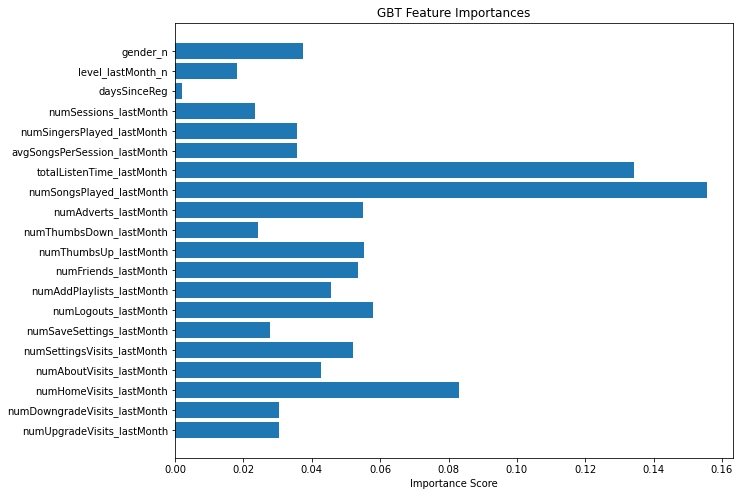

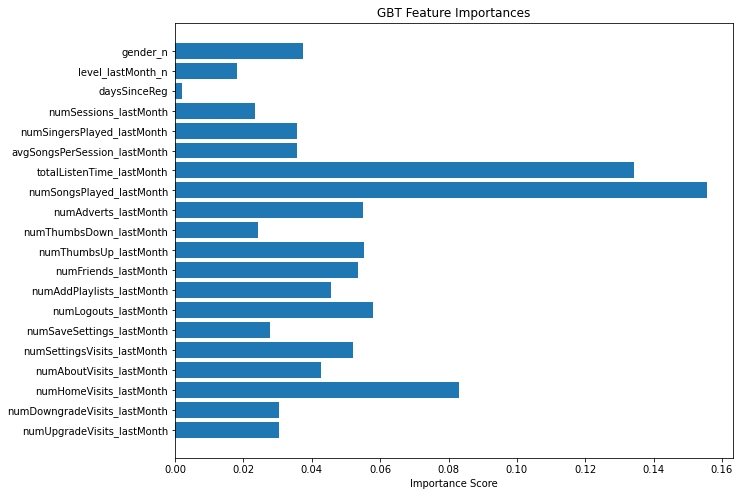

In [0]:
importances = gbt_model.bestModel.stages[-1].featureImportances.toArray()
print(importances)

inputColumns = ['numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth', 'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth', 'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
                'numLogouts_lastMonth', 'numAddPlaylists_lastMonth', 'numFriends_lastMonth', 'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth', 'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
                'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth', 'numSingersPlayed_lastMonth', 'numSessions_lastMonth', 'daysSinceReg', 'level_lastMonth_n', 'gender_n']

y_pos = np.arange(len(inputColumns))
    
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y_pos, importances)
plt.yticks(y_pos, inputColumns);
plt.xlabel('Importance Score');
plt.title('GBT Feature Importances');
display(fig)